# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [124]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
no_cities = len(cities)
print ("***" + str(no_cities) + " to be processed***")

***608 to be processed***


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [125]:
ID_df = []
city_df = []
cloud_df = []
country_df = []
date_df = []
humidity_df = []
lat_df = []
lon_df = []
maxtemp_df = []
wind_df = []
error_cities = []
error_countries = []


#for i in cities:
for  i in range(len(cities)) :
    try: 
        c = cities[i]
        print("Processing Record " + str(i) + " of Set 1 | " + c)
        url = "https://api.openweathermap.org/data/2.5/weather?q=" + cities[i] + "," + countries[i]+"&APPID=4f4e8ff1e65d570d34f6275958bc9ef1"
        JSONContent = requests.get(url).json()
        #JSONContent = requests.get("https://api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=4f4e8ff1e65d570d34f6275958bc9ef1" ).json()
        #print(requests.get(url).json())
        ID_df.append(JSONContent['id'])
        city_df.append(JSONContent['name'])
        cloud_df.append(JSONContent['clouds']['all'])
        country_df.append(countries[i])
        date_df.append(JSONContent['dt'])
        humidity_df.append(JSONContent['main']['humidity'])
        lat_df.append(JSONContent['coord']['lat'])
        lon_df.append(JSONContent['coord']['lon'])
        maxtemp_df.append((JSONContent['main']['temp_max']) * (9/5) - (459.67))
        wind_df.append(JSONContent['wind']['speed'])
    except: 
        error_cities.append(cities[i])
        error_countries.append(countries[i])
        print("****Failed**** Processing Record " + str(i) + " of Set 1 | " + c)



Processing Record 0 of Set 1 | khor
****Failed**** Processing Record 0 of Set 1 | khor
Processing Record 1 of Set 1 | lethem
Processing Record 2 of Set 1 | margate
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | beringovskiy
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | ngukurr
****Failed**** Processing Record 10 of Set 1 | ngukurr
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | south sioux city
Processing Record 14 of Set 1 | eirunepe
Processing Record 15 of Set 1 | saint george
Processing Record 16 of Set 1 | mataura
****Failed**** Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | hervey bay
Processing Record 20 

Processing Record 162 of Set 1 | colon
Processing Record 163 of Set 1 | ilulissat
Processing Record 164 of Set 1 | rondonopolis
Processing Record 165 of Set 1 | barentsburg
****Failed**** Processing Record 165 of Set 1 | barentsburg
Processing Record 166 of Set 1 | dzaoudzi
Processing Record 167 of Set 1 | makhachkala
Processing Record 168 of Set 1 | marawi
Processing Record 169 of Set 1 | lagoa
Processing Record 170 of Set 1 | hithadhoo
Processing Record 171 of Set 1 | san patricio
Processing Record 172 of Set 1 | tazovskiy
Processing Record 173 of Set 1 | ambilobe
Processing Record 174 of Set 1 | clinton
Processing Record 175 of Set 1 | seda
Processing Record 176 of Set 1 | fort nelson
Processing Record 177 of Set 1 | catuday
Processing Record 178 of Set 1 | jacqueville
Processing Record 179 of Set 1 | chicama
Processing Record 180 of Set 1 | wajir
Processing Record 181 of Set 1 | kabo
Processing Record 182 of Set 1 | tura
Processing Record 183 of Set 1 | horadiz
Processing Record 18

Processing Record 322 of Set 1 | zhigansk
Processing Record 323 of Set 1 | constitucion
Processing Record 324 of Set 1 | hofn
Processing Record 325 of Set 1 | kamina
Processing Record 326 of Set 1 | matay
Processing Record 327 of Set 1 | harper
Processing Record 328 of Set 1 | hirara
Processing Record 329 of Set 1 | thinadhoo
Processing Record 330 of Set 1 | longyearbyen
Processing Record 331 of Set 1 | dakar
Processing Record 332 of Set 1 | stawell
Processing Record 333 of Set 1 | cagliliog
Processing Record 334 of Set 1 | road town
Processing Record 335 of Set 1 | alofi
Processing Record 336 of Set 1 | narsaq
Processing Record 337 of Set 1 | stara synyava
Processing Record 338 of Set 1 | acapulco
Processing Record 339 of Set 1 | kieta
Processing Record 340 of Set 1 | saldanha
Processing Record 341 of Set 1 | banda aceh
Processing Record 342 of Set 1 | san cristobal
Processing Record 343 of Set 1 | sioux lookout
Processing Record 344 of Set 1 | samarai
Processing Record 345 of Set 1 |

Processing Record 484 of Set 1 | palmer
Processing Record 485 of Set 1 | nanga eboko
Processing Record 486 of Set 1 | halifax
Processing Record 487 of Set 1 | nipawin
Processing Record 488 of Set 1 | mount isa
Processing Record 489 of Set 1 | christchurch
Processing Record 490 of Set 1 | altamira
Processing Record 491 of Set 1 | oktyabrskoye
Processing Record 492 of Set 1 | nakamura
Processing Record 493 of Set 1 | goderich
****Failed**** Processing Record 493 of Set 1 | goderich
Processing Record 494 of Set 1 | korcula
Processing Record 495 of Set 1 | elizabeth city
Processing Record 496 of Set 1 | clyde river
Processing Record 497 of Set 1 | yabelo
Processing Record 498 of Set 1 | manokwari
Processing Record 499 of Set 1 | nadadores
Processing Record 500 of Set 1 | vagur
Processing Record 501 of Set 1 | northam
Processing Record 502 of Set 1 | yanan
****Failed**** Processing Record 502 of Set 1 | yanan
Processing Record 503 of Set 1 | sorong
Processing Record 504 of Set 1 | hobyo
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [126]:
data = {"City ID": ID_df, "City": city_df, "Cloudiness": cloud_df, "Country": country_df, "Date": date_df, "Humidity": humidity_df, "Lat": lat_df, "Lng": lon_df, "Max Temp": maxtemp_df, "Wind Speed": wind_df}
weather_df = pd.DataFrame(data) 
weather_df.head()



,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,3379316,Lethem,78,gy,1558920622,71,3.38,-59.80,81.05,4.61
1,978895,Margate,0,za,1558920622,36,-30.86,30.37,60.71,2.73
2,3863379,Mar del Plata,5,ar,1558920623,68,-46.43,-67.52,42.35,6.13
3,4030556,Rikitea,100,pf,1558920623,84,-23.12,-134.97,71.87,11.25
4,2017155,Saskylakh,7,ru,1558920623,99,71.97,114.09,34.79,4.09


In [127]:
data2 = {"Country": error_countries, "City": error_cities}
error_df = pd.DataFrame(data2) 
error_df.head()

,Country,City
0,qa,khor
1,au,ngukurr
2,pf,mataura
3,ca,longlac
4,td,faya


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

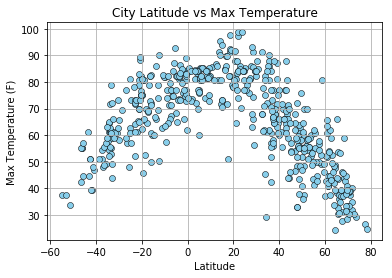

<Figure size 432x288 with 0 Axes>

In [128]:

x = weather_df["Lat"].values
y = weather_df["Max Temp"].values

plt.scatter(x, y,c="skyblue",linewidth=.5, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature")

plt.grid(True)
plt.show()

# Save Figure
from io import BytesIO
f = BytesIO()
plt.savefig(f, format="svg")

#### Latitude vs. Humidity Plot

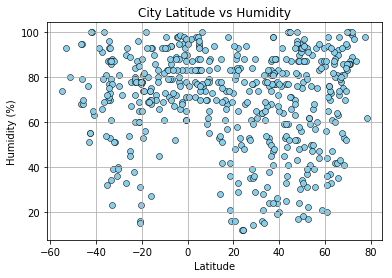

<Figure size 432x288 with 0 Axes>

In [129]:
x = weather_df["Lat"].values
y = weather_df["Humidity"].values

plt.scatter(x, y,c="skyblue",linewidth=.5, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")

plt.grid(True)
plt.show()

# Save Figure
from io import BytesIO
f = BytesIO()
plt.savefig(f, format="svg")

#### Latitude vs. Cloudiness Plot

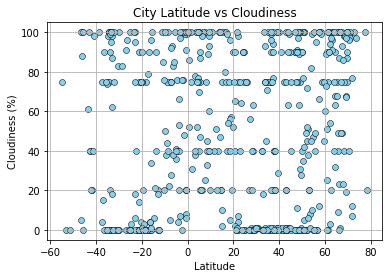

<Figure size 432x288 with 0 Axes>

In [130]:
x = weather_df["Lat"].values
y = weather_df["Cloudiness"].values

plt.scatter(x, y,c="skyblue",linewidth=.5, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")

plt.grid(True)
plt.show()

# Save Figure
from io import BytesIO
f = BytesIO()
plt.savefig(f, format="svg")

#### Latitude vs. Wind Speed Plot

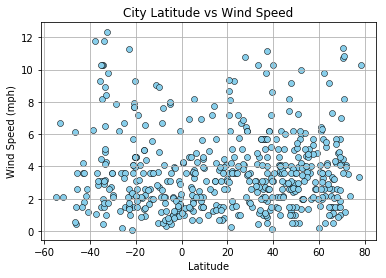

<Figure size 432x288 with 0 Axes>

In [131]:
x = weather_df["Lat"].values
y = weather_df["Wind Speed"].values

plt.scatter(x, y,c="skyblue",linewidth=.5, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed")

plt.grid(True)
plt.show()

# Save Figure
from io import BytesIO
f = BytesIO()
plt.savefig(f, format="svg")